In [1]:
import json
from PIL import Image, ImageDraw 
import matplotlib.pyplot as plt

## Config Directories

In [2]:
#BDD Annotation
bddRoot = 'BDD/bdd100k_labels_release/bdd100k/labels/'

labelsBDDTrain = bddRoot+'bdd100k_labels_images_train.json'


In [3]:
f = open(labelsBDDTrain)
data = json.load(f)
len(data)

69863

In [4]:
data[0]

{'name': '0000f77c-6257be58.jpg',
 'attributes': {'weather': 'clear',
  'scene': 'city street',
  'timeofday': 'daytime'},
 'timestamp': 10000,
 'labels': [{'category': 'traffic light',
   'attributes': {'occluded': False,
    'truncated': False,
    'trafficLightColor': 'green'},
   'manualShape': True,
   'manualAttributes': True,
   'box2d': {'x1': 1125.902264,
    'y1': 133.184488,
    'x2': 1156.978645,
    'y2': 210.875445},
   'id': 0},
  {'category': 'traffic light',
   'attributes': {'occluded': False,
    'truncated': False,
    'trafficLightColor': 'green'},
   'manualShape': True,
   'manualAttributes': True,
   'box2d': {'x1': 1156.978645,
    'y1': 136.637417,
    'x2': 1191.50796,
    'y2': 210.875443},
   'id': 1},
  {'category': 'traffic sign',
   'attributes': {'occluded': False,
    'truncated': False,
    'trafficLightColor': 'none'},
   'manualShape': True,
   'manualAttributes': True,
   'box2d': {'x1': 1101.731743,
    'y1': 211.122087,
    'x2': 1170.79037,
    

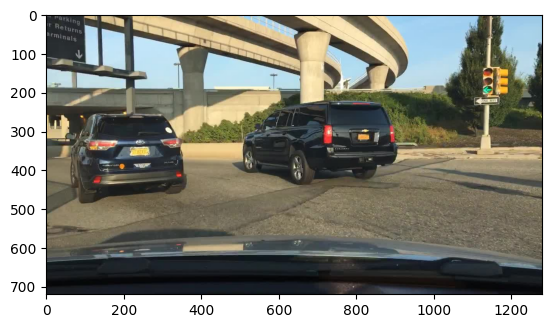

In [62]:
bddRootImage = 'BDD/bdd100k/bdd100k/images/100k/other/train/trainA/'
image = Image.open(bddRootImage+data[0]['name'])
plt.imshow(image)

{'x1': 1125.902264, 'y1': 133.184488, 'x2': 1156.978645, 'y2': 210.875445}
{'x1': 1156.978645, 'y1': 136.637417, 'x2': 1191.50796, 'y2': 210.875443}
{'x1': 1101.731743, 'y1': 211.122087, 'x2': 1170.79037, 'y2': 233.566141}
{'x1': 0, 'y1': 0.246631, 'x2': 100.381647, 'y2': 122.825696}
{'x1': 45.240919, 'y1': 254.530367, 'x2': 357.805838, 'y2': 487.906215}
{'x1': 507.82755, 'y1': 221.727518, 'x2': 908.367588, 'y2': 442.715126}
{'x1': 0.156955, 'y1': 0.809282, 'x2': 102.417429, 'y2': 133.411856}
[[1280.195648, 626.372529], [1280.195648, 371.830705], [927.081254, 366.839689], [872.180076, 427.979637], [658.814135, 450.439209], [585.196646, 426.731883], [0, 517.817928], [0, 602.665203], [497.853863, 540.2775], [927.081254, 571.471352], [1280.195648, 626.372529]]
[[503.674413, 373.137193], [357.797732, 374.672737]]
[[62.973282, 371.601649], [0, 368.53056]]
[[1274.517503, 376.208281], [905.986941, 371.601649]]


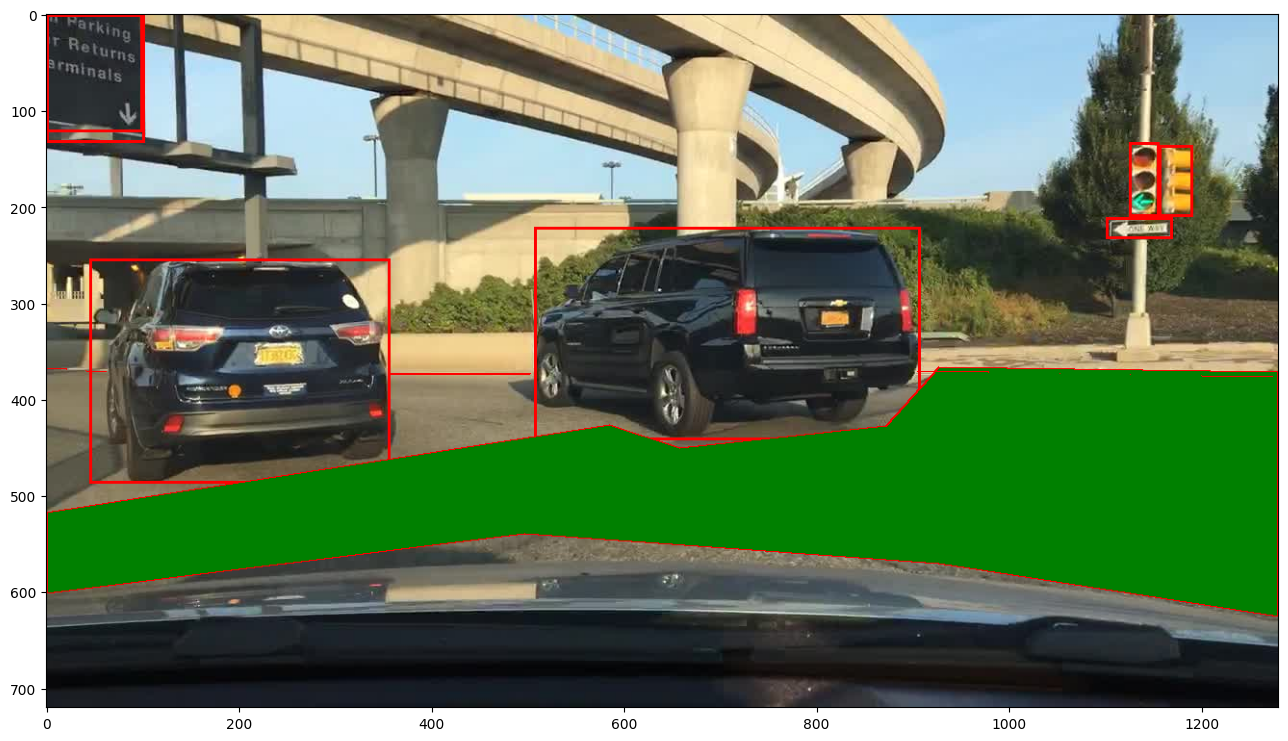

In [77]:
len(data[0]['labels'])
imCopy = image.copy()
imageDraw = ImageDraw.Draw(imCopy)
for item in data[0]['labels']:
    if('box2d' in item.keys()):
        print(item['box2d'])
        x1, y1, x2, y2 = item['box2d']['x1'], item['box2d']['y1'], item['box2d']['x2'], item['box2d']['y2']
        
        imageDraw.rectangle([(x1, y1), (x2, y2)], outline ="red", width=3) 
    if('poly2d' in item.keys()):
        print(item['poly2d'][0]['vertices'])
        converted_list = [tuple(item) for item in item['poly2d'][0]['vertices']]
        poly2d = converted_list
        imageDraw.polygon(poly2d, outline ="red", fill="green", width=2) 
plt.figure(figsize=(16,9))
plt.imshow(imCopy)
        